In [1]:
# подключаем разрешенные библиотеки
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import random

# подключаем наши модулю
import NearestNeighbors as knn
import CrossValidation as cv

In [2]:
# загружаем объекты
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# преобразуем строки в int
y = y.astype(np.int)

print("Мы имеем %d объектов, каждый из которых содержит %d признака" % (X.shape[0], X.shape[1]))

Мы имеем 70000 объектов, каждый из которых содержит 784 признака


In [3]:
# разбиваем на обучающую и тестовую выборки
train_X = X[0:60000]
train_y = y[0:60000]
validation_X = X[60000:70000]
validation_y = y[60000:70000]

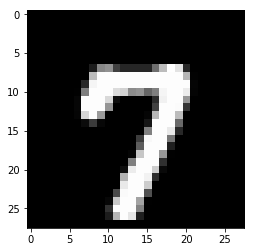

In [4]:
# посмотрим на случайный объект из валидационной выборки
randObj = random.randint(0, len(validation_X))
plt.imshow(validation_X[randObj].reshape((28, 28)), cmap='gray')
plt.show()

In [5]:
# и его целевое знаение
validation_y[randObj]

7

In [8]:
classifier = knn.KNNClassifier(
    k = 5, 
    strategy = 'brute', 
    metric = 'euclidean', 
    weights = False,    
    test_block_size = 10
)
classifier.fit(train_X, train_y)

res = classifier.find_kneighbors(validation_X)

In [11]:
res[1][0]

array([53843, 38620, 16186, 27059, 47003])

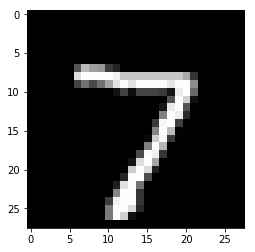

In [13]:
plt.imshow(validation_X[0].reshape((28, 28)), cmap='gray')
plt.show()

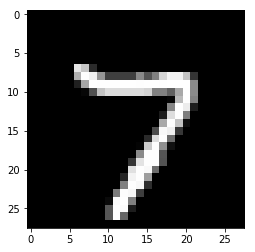

In [19]:
plt.imshow(train_X[47003].reshape((28, 28)), cmap='gray')
plt.show()